**# Action Needed**

1. Model development

2. Conclusion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Objective and Dataset**
- Develop a supervised learning classification algorithm (logistic regression) to predict whether a person has heart disease given a set of observations using the Cleveland heart disease dataset from the UCI machine learning repository

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# And some functions we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importing the file
header_list = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_heart = pd.read_csv('/content/drive/MyDrive/Group 16 Statistics for Data Science/heart_cleveland_upload.csv')
df_heart.rename(columns={'condition': 'target'}, inplace=True)

# **Exploratory Data Analysis**
- examine the features and observations, the elements in each feature
- check for nulls and missing data
- investigate the distribution and relationships

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age: age (in years)

sex: gender (1 = male; 0 = female)

cp: chest pain type

There are three criteria for classifying different types of angina (chest pain) under three categories (according to this NCBI paper: https://pubmed.ncbi.nlm.nih.gov/20494662/):

◼ Location: Chest pain occurs around the substernal portion of the body

◼ Cause: Pain is experienced after induction of emotional/physical stress

◼ Relief: The pain goes away after taking nitroglycerine and/or a rest

-- 0: typical angina (all criteria present)

-- 1: atypical angina (two of three criteria satisfied)

-- 2: non-anginal pain (less than one criteria satisfied)

-- Value 3: asymptomatic (none of the criteria are satisfied)

trestbps: resting blood pressure (in mmHg, upon admission to the hospital)

chol: serum cholesterol in mg/dL

fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false

restecg: resting electrocardiogram results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) - more on the effects of these below

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia (according to this research paper on NCBI: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7027664/)

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

Radioactive dye is introduced to the body followed by x-ray imaging to detect any structural abnormalities present in the heart. The quantity of vessels colored is positively correlated with presence of heart disease.

thal: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

Thallium testing is a method where the radioactive element thallium (Tl) is introduced to the body through an IV injection, followed by nuclear imaging of the heart with a gamma camera which reveals structural issues and abnormalities of the heart by showing whether if the isotope was absorbed by heart tissue under high (exercise) and low (rest) stress conditions.

condition: 0 = no disease, 1 = disease

In [ ]:
# Investigate all the elements whithin each Feature
for column in df_heart:
    unique_values = np.unique(df_heart[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature age is: 41
The number of values for feature sex is: 2 -- [0 1]
The number of values for feature cp is: 4 -- [0 1 2 3]
The number of values for feature trestbps is: 50
The number of values for feature chol is: 152
The number of values for feature fbs is: 2 -- [0 1]
The number of values for feature restecg is: 3 -- [0 1 2]
The number of values for feature thalach is: 91
The number of values for feature exang is: 2 -- [0 1]
The number of values for feature oldpeak is: 40
The number of values for feature slope is: 3 -- [0 1 2]
The number of values for feature ca is: 4 -- [0 1 2 3]
The number of values for feature thal is: 3 -- [0 1 2]
The number of values for feature target is: 2 -- [0 1]


In [ ]:
# data dictionary
#print(df_heart.columns)
#data_dict = dict(zip(df_heart.columns), info)
#data_dict

In [ ]:
# check for nulls and data consistency
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


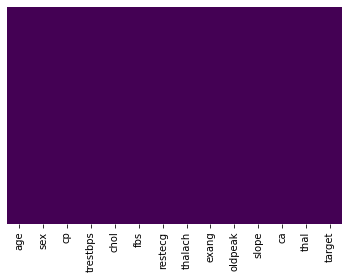

In [ ]:
#Check for missing data
sns.heatmap(df_heart.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# There are no null values

In [ ]:

df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


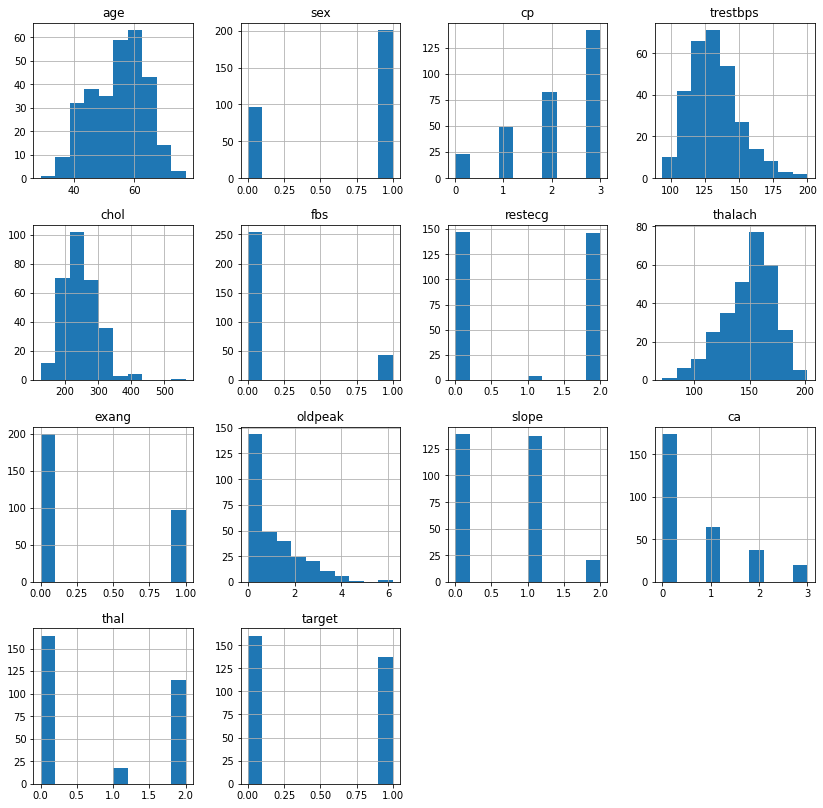

In [ ]:
# distribution of each variable
df_heart.hist(figsize=(14,14))
plt.show()

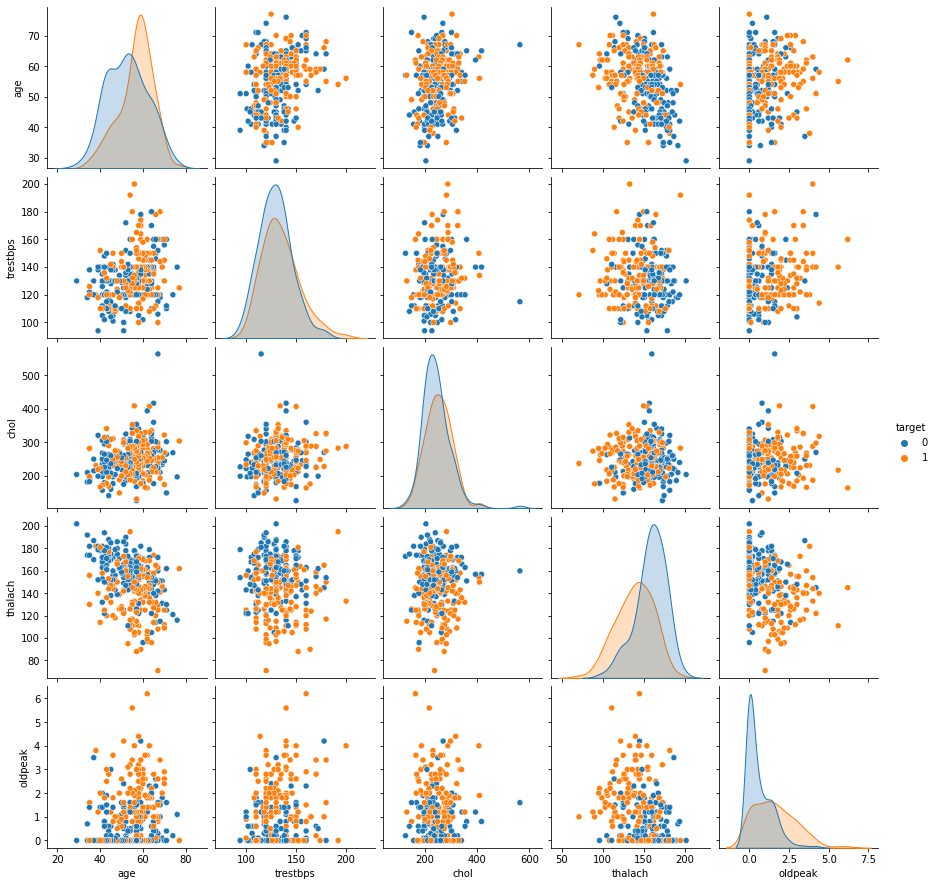

In [ ]:
#distribution of numerical variables
df_heart_numeric = df_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]
sns.pairplot(data=df_heart_numeric, hue = 'target' )

Text(0.5, 1.0, 'oldpeak')

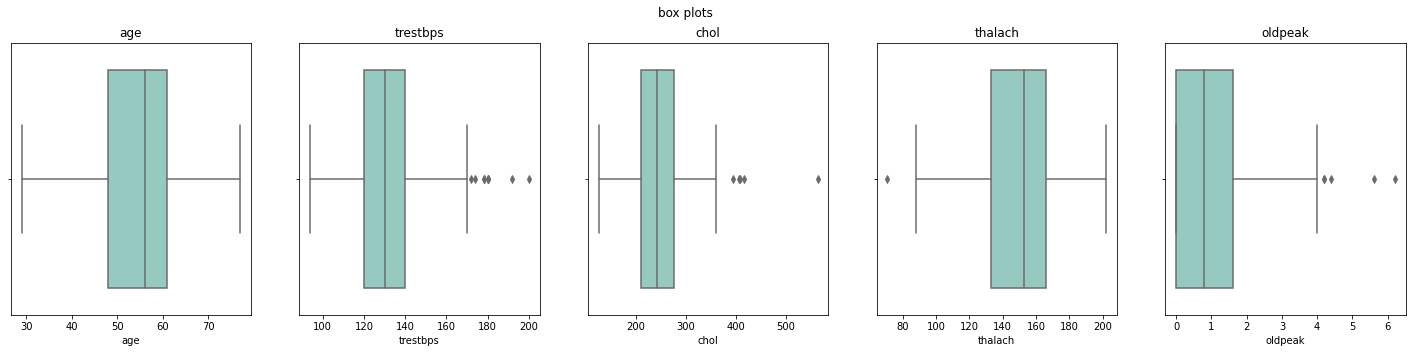

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('box plots')
sns.set_style("white")

sns.boxplot(ax=axes[0], x=df_heart_numeric['age'], palette="Set3")
axes[0].set_title('age')

sns.boxplot(ax=axes[1], x=df_heart_numeric['trestbps'], palette="Set3")
axes[1].set_title('trestbps')

sns.boxplot(ax=axes[2], x=df_heart_numeric['chol'],palette="Set3")
axes[2].set_title('chol')

sns.boxplot(ax=axes[3], x=df_heart_numeric['thalach'], palette="Set3")
axes[3].set_title('thalach')

sns.boxplot(ax=axes[4], x=df_heart_numeric['oldpeak'], palette="Set3")
axes[4].set_title('oldpeak')

In [ ]:
#Find the InterQuartile Range for Outliers
Q1 = df_heart_numeric.quantile(0.25)
Q3 = df_heart_numeric.quantile(0.75)

IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         13.0
trestbps    20.0
chol        65.0
thalach     33.0
oldpeak      1.6
target       1.0
dtype: float64


In [ ]:
# Remove the outliers using IQR
df_heart = df_heart[~((df_heart<(Q1-1.5*IQR))|(df_heart>(Q3+1.5*IQR))).any(axis=1)]
df_heart.shape

(278, 14)

In [ ]:
# calculating zscore of numeric columns in the dataset
# z = np.abs(stats.zscore(df_heart[['trestbps', 'chol']]))
# Defining threshold for filtering outliers
# threshold = 3
# print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers, which mean z[45][0] have a Z-score higher than 3. There are total 9 data points which are outliers.
#filtering outliers retaining only those data points which are below threshhold
# df_heart = df_heart[(z < threshold).all(axis=1)]

Text(0.5, 1.0, 'oldpeak')

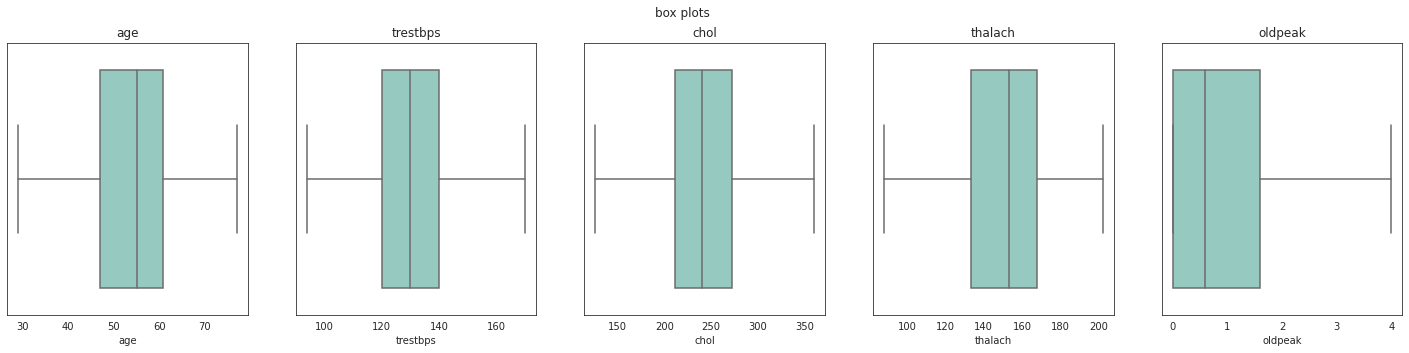

In [ ]:
# checking shape of dataset after outlier removal
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('box plots')
sns.set_style("white")

sns.boxplot(ax=axes[0], x=df_heart['age'], palette="Set3")
axes[0].set_title('age')

sns.boxplot(ax=axes[1], x=df_heart['trestbps'], palette="Set3")
axes[1].set_title('trestbps')

sns.boxplot(ax=axes[2], x=df_heart['chol'],palette="Set3")
axes[2].set_title('chol')

sns.boxplot(ax=axes[3], x=df_heart['thalach'], palette="Set3")
axes[3].set_title('thalach')

sns.boxplot(ax=axes[4], x=df_heart['oldpeak'], palette="Set3")
axes[4].set_title('oldpeak')

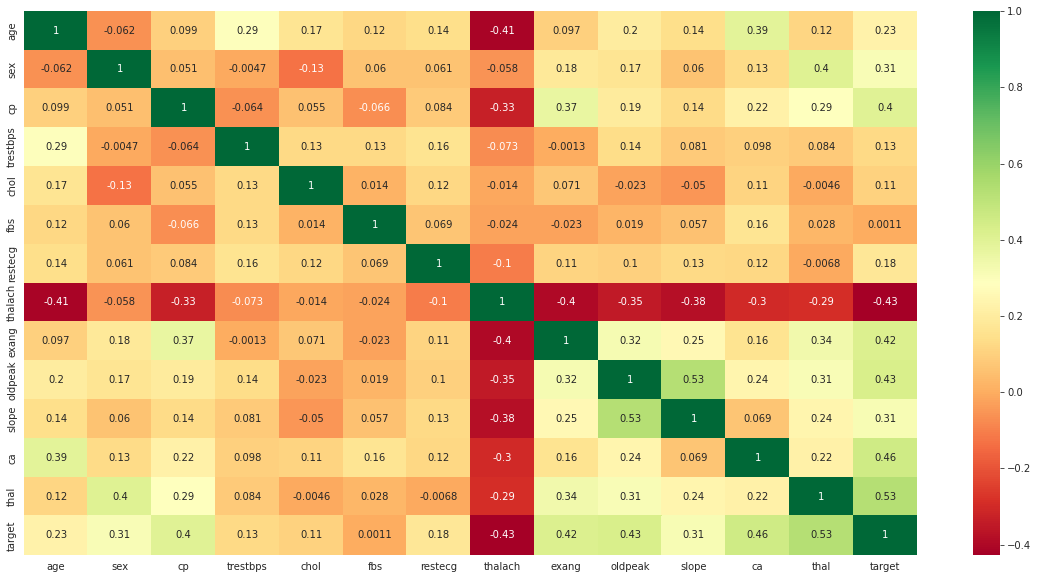

In [ ]:
#correlation coeff
plt.figure(figsize=(20,10))
sns.heatmap(df_heart.corr(), annot=True, cmap="RdYlGn")

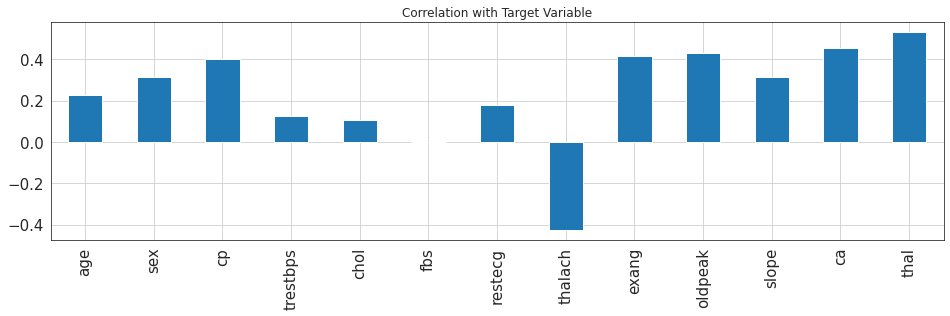

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df_heart.drop(['target'],axis=1)
y = df_heart['target']
#Correlation with Target variable
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Target Variable", fontsize = 15,
        rot = 90, grid = True)


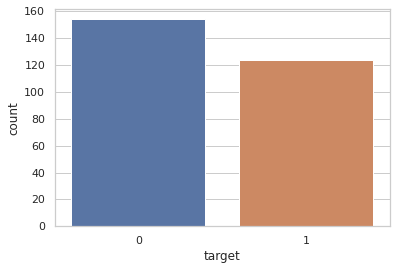

In [ ]:
# check if target count is balance
sns.set(style='whitegrid')
sns.countplot(x='target', data=df_heart)

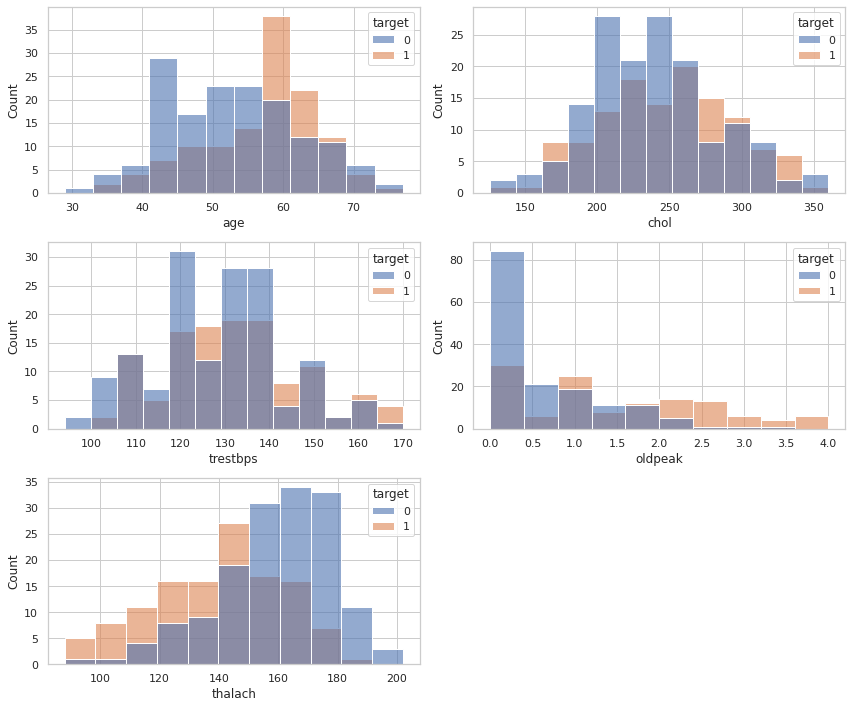

In [ ]:
sns.set(style='whitegrid')

#define plotting region
fig, axes = plt.subplots(3, 2, figsize=(12,10))

#create histplot in each subplot
sns.histplot(data=df_heart, x='age', hue="target", alpha=0.6, ax=axes[0, 0])
sns.histplot(data=df_heart, x='chol', hue="target", alpha=0.6, ax=axes[0, 1])
sns.histplot(data=df_heart, x="trestbps", hue="target", alpha=0.6, ax=axes[1,0])
sns.histplot(data=df_heart, x="oldpeak", hue="target", alpha=0.6, ax=axes[1,1])
sns.histplot(data=df_heart, x="thalach", hue="target", alpha=0.6, ax=axes[2,0])

fig.delaxes(axes[2,1])

fig.tight_layout()

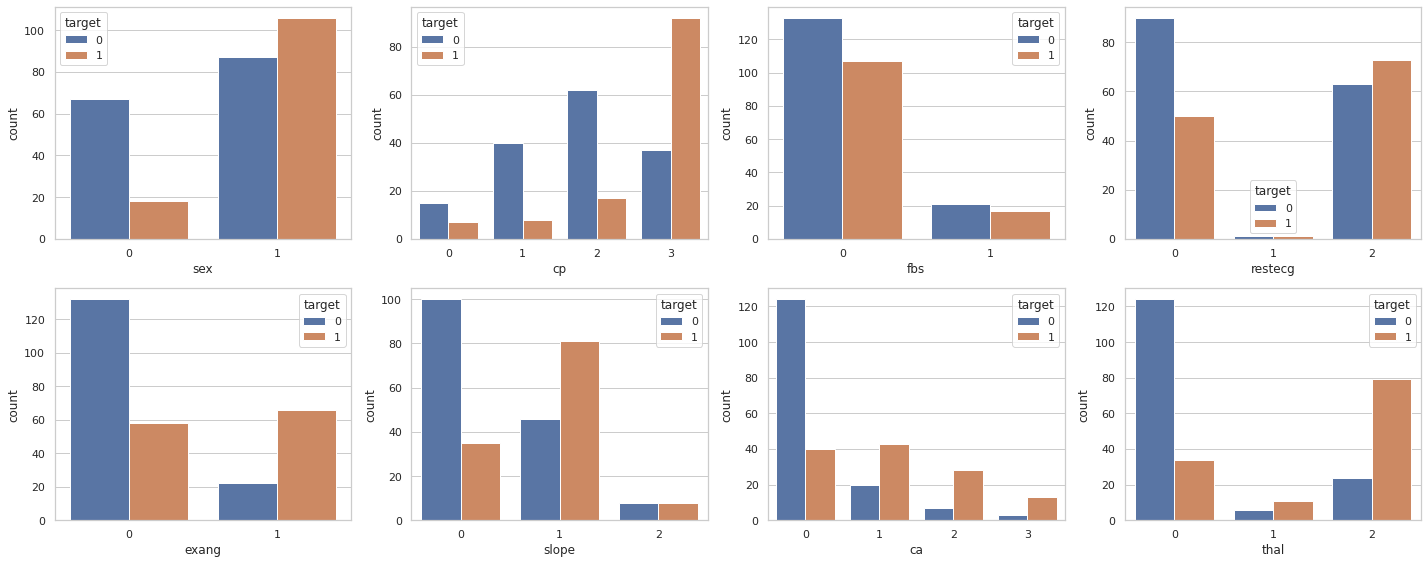

In [ ]:
sns.set(style='whitegrid')

#define plotting region
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

#create countplot in each subplot
sns.countplot(data=df_heart, x='sex', hue="target", ax=axes[0, 0])
sns.countplot(data=df_heart, x='cp', hue="target", ax=axes[0, 1])
sns.countplot(data=df_heart, x='fbs', hue="target", ax=axes[0, 2])
sns.countplot(data=df_heart, x='restecg', hue="target", ax=axes[0, 3])
sns.countplot(data=df_heart, x="exang", hue="target", ax=axes[1,0])
sns.countplot(data=df_heart, x="slope", hue="target", ax=axes[1,1])
sns.countplot(data=df_heart, x="ca", hue="target", ax=axes[1,2])
sns.countplot(data=df_heart, x="thal", hue="target", ax=axes[1,3])

fig.tight_layout()

# **Data Cleansing**
  - Check for categorical / ordinal variables
  - Check for multicollinearity within the independent variables
  - Check for outliers

Treat Ordinal Variables


In [ ]:
#cp, restecg, slope, thal - these variables are essentially categorical variables
#drop_first=True or else there will be perfect correlation
df_heart2 = df_heart.copy()
dummy_cp = pd.get_dummies(df_heart2['cp'], prefix='cp', drop_first=True)
dummy_restecg = pd.get_dummies(df_heart2['restecg'], prefix='restecg', drop_first=True)
dummy_slope = pd.get_dummies(df_heart2['slope'], prefix='slope', drop_first=True)
dummy_thal = pd.get_dummies(df_heart2['thal'], prefix='thal', drop_first=True)

df_heart2 = df_heart2.join(dummy_cp)
df_heart2 = df_heart2.join(dummy_restecg)
df_heart2 = df_heart2.join(dummy_slope)
df_heart2 = df_heart2.join(dummy_thal)

df_heart2 = df_heart2.drop(['cp','restecg','slope', 'thal'], axis=1)

#Reorder target to end of dataframe
reorder = df_heart2['target']
df_heart2.drop(labels=['target'], axis=1, inplace = True)
df_heart2.insert(18, 'target', reorder)
df_heart2.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,target
0,69,1,160,234,1,131,0,0.1,1,0,0,0,0,1,1,0,0,0,0
1,69,0,140,239,0,151,0,1.8,2,0,0,0,0,0,0,0,0,0,0
2,66,0,150,226,0,114,0,2.6,0,0,0,0,0,0,0,1,0,0,0
3,65,1,138,282,1,174,0,1.4,1,0,0,0,0,1,1,0,0,0,1
4,64,1,110,211,0,144,1,1.8,0,0,0,0,0,1,1,0,0,0,0


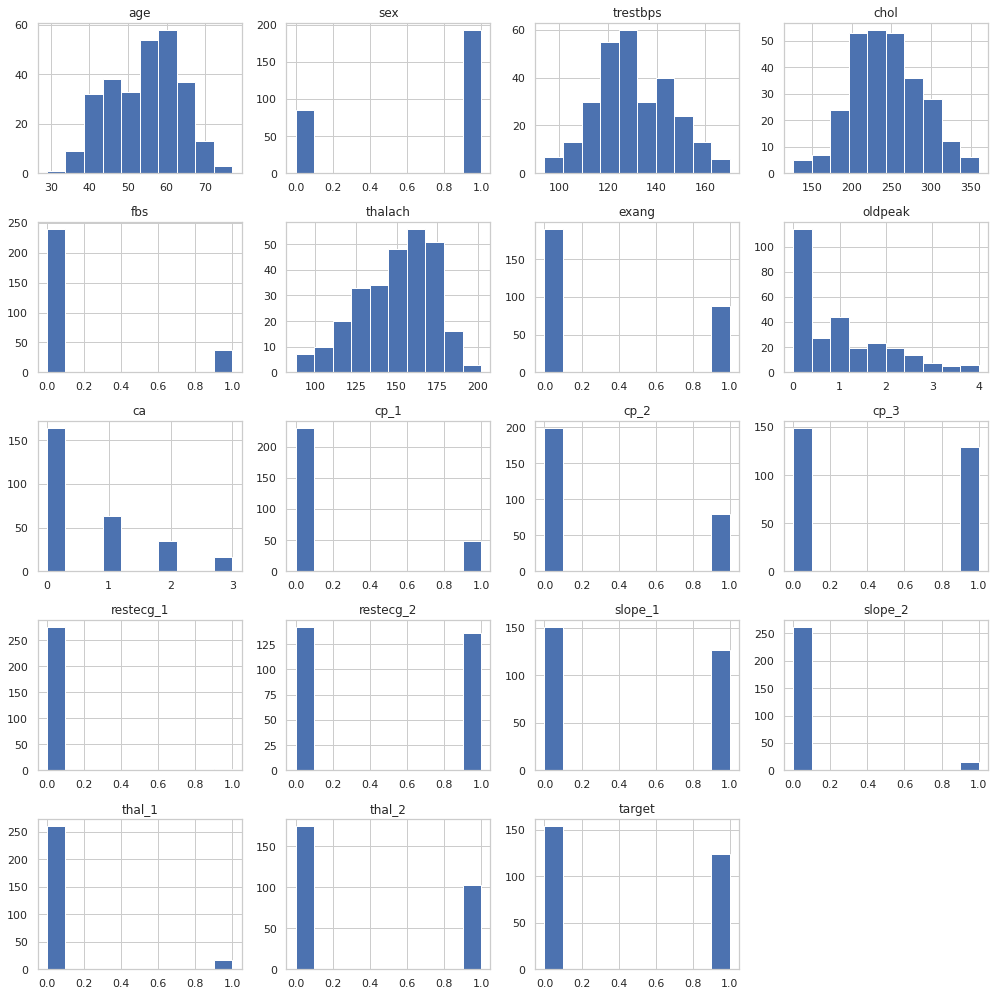

In [ ]:
# distribution of each variable
df_heart2.hist(figsize=(14,14))
plt.tight_layout()
plt.show()

Variance Inflation Factor (VIF) measures the degree of multicollinearity in a set of independent variables.

Mathematically, it is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

The smallest possible value for VIF is 1 (i.e., a complete absence of collinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of multicollinearity.

In [ ]:
#Checking for Multicolinearity using Variance Inflation Factors
# If there are variables that are highly correlated, or have a high VIF, a corrective action would be to drop one of them since they are measuring the same/similar thing.

# the independent variables set
X = df_heart2.iloc[:, 0:-1]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

      Feature        VIF
0         age  43.380772
1         sex   4.267156
2    trestbps  70.495365
3        chol  32.922930
4         fbs   1.282347
5     thalach  40.813481
6       exang   2.108731
7     oldpeak   3.081593
8          ca   2.084139
9        cp_1   3.178086
10       cp_2   4.329212
11       cp_3   6.841872
12  restecg_1   1.072261
13  restecg_2   2.178739
14    slope_1   2.838306
15    slope_2   1.402288
16     thal_1   1.367289
17     thal_2   2.541403


# **Data Pre-processing for Model fitting**
- Normalize and scale the data, if needed - not required for log reg.
- Split the data into train and test data sets - split to 80/20

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df_heart2.drop(['target'],axis=1)
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

X_train.shape

Distribution of target variable in training set
0    123
1     99
Name: target, dtype: int64
Distribution of target variable in test set
0    31
1    25
Name: target, dtype: int64


(222, 18)

In [ ]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2'],
      dtype='object')

#**Model Development**#
- Using Logistic Regression, train the model using x% of the data (train_dataset)

In [ ]:

#Eliminate features with non-significant coefficients one-by-one, while keeping the model
#deviance as low as possible.  A coefficient is deemed significant if its fitted z-score is above 2.0.

#model0 -  using all predictors

predictors = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))



         Current function value: 0.298188
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           17
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5661
Time:                        16:01:44   Log-Likelihood:                -66.198
converged:                      False   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 7.944e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0337      0.026     -1.285      0.199      -0.085       0.018
sex            1.0243      0.624      1.643      0.100      -0.19

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#model1 -  dropping 'restecg_1',

predictors = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca',  'cp_1','cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.298360
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5659
Time:                        16:02:09   Log-Likelihood:                -66.236
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 2.450e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0342      0.026     -1.312      0.189      -0.085       0.017
sex            1.0277      0.

In [ ]:
#model2 -  dropping  restecg_1, chol

predictors = ['age', 'sex', 'trestbps',  'fbs', 'thalach', 'exang', 'oldpeak',
       'ca',  'cp_1','cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.298363
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5659
Time:                        16:02:58   Log-Likelihood:                -66.237
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 7.062e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0344      0.026     -1.329      0.184      -0.085       0.016
sex            1.0305      0.

In [ ]:
#model3 -  dropping  restecg_1, chol, 'exang',

predictors = ['age', 'sex', 'trestbps',  'fbs', 'thalach',  'oldpeak',
       'ca',  'cp_1','cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.298369
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                           14
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5659
Time:                        16:03:35   Log-Likelihood:                -66.238
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 1.965e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0342      0.026     -1.333      0.182      -0.084       0.016
sex            1.0316      0.

In [ ]:
#model4 -  dropping restecg_1, chol, 'exang','cp_1',

predictors = ['age', 'sex', 'trestbps',  'fbs', 'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.298686
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                           13
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5654
Time:                        16:04:03   Log-Likelihood:                -66.308
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 5.617e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0322      0.025     -1.283      0.200      -0.081       0.017
sex            0.9815      0.

In [ ]:
#model5 -  dropping restecg_1, chol, 'exang','cp_1','fbs',

predictors = ['age', 'sex', 'trestbps',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.299586
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5641
Time:                        16:04:26   Log-Likelihood:                -66.508
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 1.741e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0317      0.025     -1.263      0.207      -0.081       0.017
sex            0.9769      0.

In [ ]:
#model6 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1',

predictors = ['age', 'sex', 'trestbps',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2',  'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.300306
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                           11
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5631
Time:                        16:04:51   Log-Likelihood:                -66.668
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 4.976e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0313      0.025     -1.257      0.209      -0.080       0.018
sex            1.1023      0.

In [ ]:
#model7 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps',

predictors = ['age', 'sex',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2',  'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.302932
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5592
Time:                        16:05:16   Log-Likelihood:                -67.251
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 2.029e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0162      0.020     -0.801      0.423      -0.056       0.023
sex            1.1132      0.

In [ ]:
#model8 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps', 'age',

predictors = [ 'sex',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',  'restecg_2', 'slope_1',
       'slope_2',  'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.304403
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            9
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5571
Time:                        16:05:36   Log-Likelihood:                -67.578
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 6.163e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.1677      0.555      2.104      0.035       0.080       2.255
thalach       -0.0273      0.

In [ ]:
#model9 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps', 'age','restecg_2',

predictors = [ 'sex',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',   'slope_1',
       'slope_2',  'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.307529
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5526
Time:                        16:05:59   Log-Likelihood:                -68.271
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 2.516e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.2478      0.549      2.272      0.023       0.171       2.324
thalach       -0.0260      0.

In [ ]:
#model10 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps', 'age','restecg_2','slope_2',

predictors = [ 'sex',   'thalach',  'oldpeak',
       'ca',  'cp_2', 'cp_3',   'slope_1',
         'thal_2']

m = Logit(y_train ,X_train[predictors])
m = m.fit()
print(m.summary())
conf_mat = m.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.310928
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5476
Time:                        16:06:31   Log-Likelihood:                -69.026
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 1.023e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.2527      0.540      2.320      0.020       0.194       2.311
thalach       -0.0255      0.

In [ ]:
#model11 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps', 'age','restecg_2','slope_2','cp_2',

predictors11 = [ 'sex',   'thalach',  'oldpeak',
       'ca',   'cp_3',   'slope_1',
         'thal_2']

m11 = Logit(y_train ,X_train[predictors11])
m11 = m11.fit()
print(m11.summary())
conf_mat = m11.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.317830
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      215
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5376
Time:                        16:07:09   Log-Likelihood:                -70.558
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 8.248e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.1912      0.526      2.263      0.024       0.159       2.223
thalach       -0.0273      0.

In [ ]:
#model12 -  dropping restecg_1, chol, 'exang','cp_1','fbs','thal_1','trestbps', 'age','restecg_2','slope_2','cp_2','slope_1',

predictors12 = [ 'sex',   'thalach',  'oldpeak',
       'ca',   'cp_3',
         'thal_2']

m12 = Logit(y_train ,X_train[predictors12])
m12 = m12.fit()
print(m12.summary())
conf_mat12 = m12.pred_table()
print (conf_mat)
tn, fp, fn, tp = conf_mat12.flatten()
#print (tn, fp, fn, tp)
acc = (tp + tn) / np.sum(conf_mat12)
print ("Accuraccy of the model with training set is: %1.2f" % acc)
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Optimization terminated successfully.
         Current function value: 0.324733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  222
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.5275
Time:                        16:07:42   Log-Likelihood:                -72.091
converged:                       True   LL-Null:                       -152.58
Covariance Type:            nonrobust   LLR p-value:                 6.130e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            1.0949      0.512      2.137      0.033       0.091       2.099
thalach       -0.0258      0.

In [ ]:
#USING SKLEARN MODEL, Model 11

# segregating dataset into features i.e., X and target variables i.e., y
X = df_heart2[predictors11]
y = df_heart2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

log_reg11 = LogisticRegression(random_state=10, C=1e10)
log_reg11.fit(X_train, y_train)

y_pred11 = log_reg11.predict(X_train)

# Accuracy on Train
print("The Training Accuracy is: ", log_reg11.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg11.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred11))

The Training Accuracy is:  0.8738738738738738
The Testing Accuracy is:  0.8035714285714286
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       123
           1       0.89      0.82      0.85        99

    accuracy                           0.87       222
   macro avg       0.88      0.87      0.87       222
weighted avg       0.87      0.87      0.87       222



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


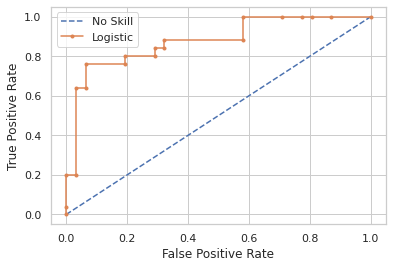

In [ ]:
# roc curve and auc for Model 11

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = log_reg11.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#USING SKLEARN MODEL, Model 12

#segregating dataset into features i.e., X and target variables i.e., y
X = df_heart2[predictors12]
y = df_heart2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
log_reg12 = LogisticRegression(random_state=10, C=1e10)
log_reg12.fit(X_train, y_train)

y_pred12 = log_reg12.predict(X_train)

# Accuracy on Train
print("The Training Accuracy is: ", log_reg12.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg12.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred12))


The Training Accuracy is:  0.8603603603603603
The Testing Accuracy is:  0.8035714285714286
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       123
           1       0.86      0.82      0.84        99

    accuracy                           0.86       222
   macro avg       0.86      0.86      0.86       222
weighted avg       0.86      0.86      0.86       222



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.855


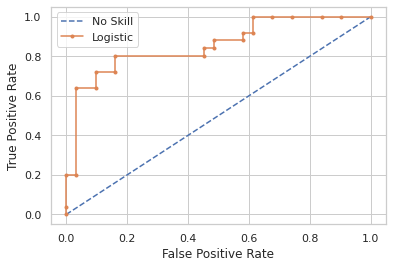

In [ ]:
# roc curve and auc for Model 12

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = log_reg12.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# **Predictions and Model Evaluation**
- Using the test dataset, evaluate the trained model using identified metrics, Accuracy, Confusion Matrix etc

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

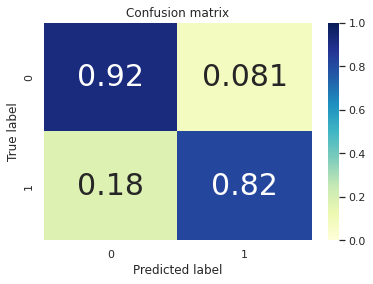

In [ ]:
# Visualizing cm - Model 11

cm11 = confusion_matrix(y_train, y_pred11)
cm_norm11 = cm11 / cm11.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm11, classes = log_reg11.classes_, title='Confusion matrix')

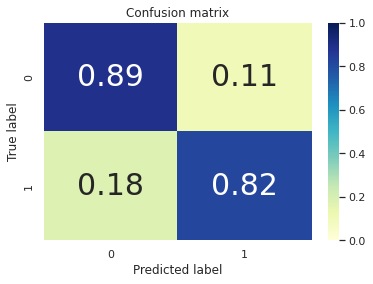

In [ ]:
# Visualizing cm - Model 12

cm12 = confusion_matrix(y_train, y_pred12)
cm_norm12 = cm12 / cm12.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm12, classes = log_reg12.classes_, title='Confusion matrix')

# **Conclusion**


After performing stepwise backward elimination using the p-value we were left with two potential models.  This section presents the results achieved in the experiments with Model 11 that includes features : ['sex',   'thalach',  'oldpeak', 'ca',   'cp_3',   'slope_1', 'thal_2'], and Model 12 with features : ['sex',   'thalach',  'oldpeak', 'ca',   'cp_3', 'thal_2'].

It it also noted that the features which initially had high mulitcolinearity were removed through our backward elimination method and were no longer in the model.

The logistic regression for Model 11 has accuracy 87%, Mathews correlation coefficient 74%, Precision 88%, Recall 82%, Confusion Matrix False Negative 18%, False positive 8.1% and ROC AUC 87.6%. The logistic regression for Model 12 has accuracy 86%, Mathews correlation coefficient 72%, Precision 86%, Recall 82%, Confusion Matrix False Negative 18%, False positive 11% and ROC AUC 85.5%.
